<a href="https://colab.research.google.com/github/mateosuster/nlpPapers/blob/main/code/05_LDA_TopicModels_GENSIM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [69]:
%%capture
!pip install pyLDAvis==2.1.2

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter


from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

# Data

In [74]:
data = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/data_clean.csv")

dataset = data.text.tolist()
dataset[0]

'used think output translation machine would stylistically inelegant would tolerable message got across find getting message across accurately difficult may able stylistic elegance output since much style reflects depth phenomena thus systematic example order clauses many twoclause sentences reversed without change meaning normally true sentences two clauses meaning usually changes clause order changed equivalently appear severe restrictions clause order given meaning restrictions appear follow depth considerations idea investigated normal clause order deviations order must signalled special syntactic semantic devices nature devices explored translating sentences may trouble due fact clause types two languages exactly parallel therefore list allowed preferred clause orders two languages equivalent special syntactic semantic devices available signal deviations normal order different thus one would predict sentences language often split two sentences translated language time sentences la

In [42]:
type(dataset)

list

# Preproc

In [86]:
texts = [word_tokenize(str(doc)) for doc in dataset]

print(texts[0])
'translation' in texts[0]

['used', 'think', 'output', 'translation', 'machine', 'would', 'stylistically', 'inelegant', 'would', 'tolerable', 'message', 'got', 'across', 'find', 'getting', 'message', 'across', 'accurately', 'difficult', 'may', 'able', 'stylistic', 'elegance', 'output', 'since', 'much', 'style', 'reflects', 'depth', 'phenomena', 'thus', 'systematic', 'example', 'order', 'clauses', 'many', 'twoclause', 'sentences', 'reversed', 'without', 'change', 'meaning', 'normally', 'true', 'sentences', 'two', 'clauses', 'meaning', 'usually', 'changes', 'clause', 'order', 'changed', 'equivalently', 'appear', 'severe', 'restrictions', 'clause', 'order', 'given', 'meaning', 'restrictions', 'appear', 'follow', 'depth', 'considerations', 'idea', 'investigated', 'normal', 'clause', 'order', 'deviations', 'order', 'must', 'signalled', 'special', 'syntactic', 'semantic', 'devices', 'nature', 'devices', 'explored', 'translating', 'sentences', 'may', 'trouble', 'due', 'fact', 'clause', 'types', 'two', 'languages', 'exa

True

## Ajuste para LDA

Documentacion de filter_extremes: https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.filter_extremes.html 

In [76]:
dictionary = corpora.Dictionary(texts) # asocia cada palabra con un ID
print(len(dictionary))

dictionary.filter_extremes(no_below=10, no_above=0.5) #filtra palabras con frecuencia menor a no_below (absoluto) y mayor a no_above (fraccion)
print(len(dictionary))

37082
7917



por cada texto en el dataset, le pasamos un conversor a bag of words: el documento # tiene n palabras de ID_i, ID_j, etc.

esto es mas economico dado que permite  reducir la esparcidad de la matriz 

In [77]:
corpus = [dictionary.doc2bow(text) for text in texts] 

## LSI y LDA

In [78]:
semilla = 420

# before training/inference:
np.random.seed(semilla)

In [79]:
lsamodel = LsiModel(corpus=corpus, num_topics=25, id2word=dictionary )

In [80]:
lsamodel.print_topics(10,4)


[(0, '-0.679*"de" + -0.280*"la" + -0.277*"des" + -0.233*"les"'),
 (1, '0.298*"language" + 0.263*"model" + 0.227*"data" + 0.220*"models"'),
 (2,
  '-0.544*"translation" + 0.398*"model" + 0.301*"models" + -0.236*"system"'),
 (3,
  '0.561*"translation" + -0.363*"corpus" + 0.323*"model" + -0.250*"language"'),
 (4, '-0.772*"language" + -0.251*"models" + 0.189*"corpus" + 0.167*"system"'),
 (5, '-0.796*"data" + 0.315*"word" + -0.210*"training" + 0.158*"words"'),
 (6, '0.543*"word" + -0.386*"system" + -0.332*"task" + 0.244*"data"'),
 (7, '-0.607*"model" + -0.478*"corpus" + 0.294*"word" + 0.233*"task"'),
 (8, '-0.615*"models" + 0.416*"model" + 0.247*"data" + 0.247*"system"'),
 (9,
  '-0.355*"corpus" + -0.351*"models" + 0.328*"information" + -0.300*"task"')]

In [81]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, iterations = 2000, passes=10)


In [82]:
ldamodel.print_topics(10, 8)

[(0,
  '0.026*"task" + 0.022*"classification" + 0.021*"social" + 0.020*"text" + 0.018*"extraction" + 0.017*"news" + 0.017*"media" + 0.017*"information"'),
 (1,
  '0.070*"de" + 0.030*"des" + 0.029*"la" + 0.026*"les" + 0.026*"et" + 0.019*"transformer" + 0.019*"le" + 0.017*"un"'),
 (2,
  '0.024*"task" + 0.015*"system" + 0.012*"paper" + 0.011*"results" + 0.011*"languages" + 0.010*"using" + 0.009*"features" + 0.008*"data"'),
 (3,
  '0.027*"dialogue" + 0.026*"speech" + 0.016*"user" + 0.013*"human" + 0.012*"users" + 0.011*"system" + 0.010*"systems" + 0.010*"multimodal"'),
 (4,
  '0.048*"translation" + 0.024*"machine" + 0.016*"evaluation" + 0.015*"systems" + 0.014*"quality" + 0.014*"system" + 0.012*"summarization" + 0.012*"language"'),
 (5,
  '0.025*"language" + 0.021*"corpus" + 0.017*"data" + 0.015*"annotation" + 0.013*"research" + 0.012*"paper" + 0.011*"languages" + 0.008*"available"'),
 (6,
  '0.026*"semantic" + 0.020*"word" + 0.015*"words" + 0.012*"information" + 0.011*"relations" + 0.011*

## Visualizacion de los topicos

In [143]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.167464 -0.000629       1        1  29.714165
5      0.138703  0.018633       2        1  15.119252
2      0.161187 -0.004200       3        1  13.266794
6      0.130983  0.018275       4        1  10.836866
1     -0.309116  0.244280       5        1   9.593947
4      0.167630  0.013342       6        1   9.375251
3      0.080084 -0.030335       7        1   5.675240
0      0.065944 -0.011626       8        1   4.486292
7     -0.296434 -0.364026       9        1   1.217152
9     -0.306445  0.116285      10        1   0.715039, topic_info=              Term          Freq         Total Category  logprob  loglift
1208            de   9427.000000   9427.000000  Default  30.0000  30.0000
72     translation   6333.000000   6333.000000  Default  29.0000  29.0000
222           task   9162.000000   9162.000000  Default  28.0000  28.0000
731         models  10756.000000  10756.000000  Default  27.0000  27.0000
1210           des   3962.000000   3962.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
622          codes    182.958868    226.471488  Topic10  -4.0017   4.7272
1955  interactions    160.557687    368.363566  Topic10  -4.1324   4.1102
3293       medical    163.229571    481.566294  Topic10  -4.1158   3.8587
2682  instructions     84.324665    161.964247  Topic10  -4.7763   4.2879
1723       experts     83.283133    317.825110  Topic10  -4.7888   3.6013

[607 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6111      9  0.996553     ablation
7646      8  0.986443         absa
7611      1  0.091013  abstractive
7611      6  0.905344  abstractive
7562      8  0.997249      abusive
...     ...       ...          ...
574       6  0.057522         work
574       7  0.029760         work
574       8  0.035313         work
5276      8  0.989559        worse
4769      6  0.993392          wsd

[1230 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 3, 7, 2, 5, 4, 1, 8, 10])

## Distribucion de los topicos por año

Para un documento en particular

In [135]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(word_tokenize(new_text))
lda_vector = ldamodel[bow_vector]
print(lda_vector) # imprime las probabilidades de cada topico

# print the document's single most prominent LDA topic (palabras mas frecuentes de topico mas probable )
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(2, 0.2957455), (3, 0.0627075), (4, 0.15181106), (5, 0.20666568), (6, 0.20013016), (7, 0.011000595), (8, 0.038367312), (9, 0.031997275)]
0.024*"task" + 0.015*"system" + 0.012*"paper" + 0.011*"results" + 0.011*"languages" + 0.010*"using" + 0.009*"features" + 0.008*"data" + 0.008*"shared" + 0.008*"model"


Cargo todos los papers y corro el LDA sobre ellos y Aplico el mismo preprocesamiento


In [148]:
papers = pd.read_csv('https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv')

STOP_WORDS_en = stopwords.words("english")

STOP_WORDS_fr = stopwords.words("french")
STOP_WORDS = STOP_WORDS_fr + STOP_WORDS_en

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS_en and word.isalpha() and len(word)>1]
    
papers_text  = [tokenize(str(doc).lower()) for doc in papers.ABSTRACT]
papers_text_df = pd.DataFrame([' '.join(text) for text in papers_text], columns = ['text'])

papers_text_df

,text
0,text worlds virtual environments embodied agen...
1,prototype system playing minimal improvisation...
2,characters npcs significantly enhance player e...
3,interactive question answering iqa requires in...
4,purpose extended abstract discuss possible fru...
...,...
33806,paper deals problem representing useful form w...
33807,becomes evident successful pragmatics automati...
33808,establishing grammatical description language ...
33809,grammar based upon conventional morphemic anal...


In [163]:
results = []

for text_i in papers_text_df.text:

  # transform held_out_text into the bag-of-words space
  bow_vector = dictionary.doc2bow(word_tokenize(str(text_i)))
  lda_vector_i = ldamodel[bow_vector]

  # converting to dict
  result = dict(lda_vector_i)
  results.append(result)

topics_dis = pd.DataFrame(results)
topics_dis['year'] = papers.YEAR 
topics_dis = topics_dis.melt(id_vars = 'year', var_name='topic', value_name='prob')
topics_dis

,year,topic,prob
0,2022,0,0.029780
1,2022,0,0.059540
2,2022,0,NaN
3,2022,0,0.019596
4,2022,0,NaN
...,...,...,...
338105,1963,9,NaN
338106,1963,9,0.011225
338107,1963,9,0.046298
338108,1963,9,NaN


In [164]:
topics_dis = topics_dis.groupby(['year', 'topic' ], as_index= False).agg(
    {'prob' : ['mean', 'median', 'std', 'count'] }
     )

topics_dis.column = ['year', 'topic' , 'prob_mean', 'prob_median', 'std', 'count' ]

topics_dis

year topic      prob                          
                     mean    median       std count
0    1963     0  0.079241  0.057825  0.081513     7
1    1963     1  0.255191  0.017786  0.476987     4
2    1963     2  0.218025  0.196896  0.101049    27
3    1963     3  0.080099  0.068073  0.063991    15
4    1963     4  0.108632  0.091057  0.106631    23
..    ...   ...       ...       ...       ...   ...
385  2022     5  0.154214  0.111579  0.131584  1764
386  2022     6  0.114545  0.085499  0.096387  1839
387  2022     7  0.036736  0.025144  0.031659  1194
388  2022     8  0.486340  0.504630  0.206353  2982
389  2022     9  0.028372  0.019129  0.023880   863

[390 rows x 6 columns]

# Comparacion LDA y LSA

In [ ]:
lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(10,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(10,formatted=False)]

In [ ]:
ldatopics[0]

['information',
 'text',
 'analysis',
 'documents',
 'social',
 'sentiment',
 'news',
 'users',
 'event',
 'extraction']

In [ ]:
lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

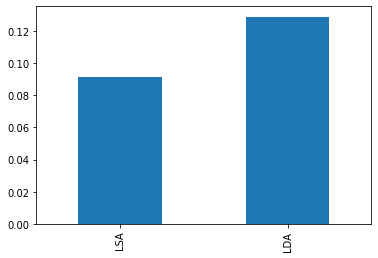

In [ ]:
df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();

In [ ]:
df_lda.sort_values(by='coherence',ascending=False)

,topic_id,coherence,topic
5,5,0.555164,"[de, des, la, les, et, un, le, une, nous, en]"
6,6,0.168902,"[word, semantic, words, lexical, syntactic, pa..."
9,9,0.135183,"[translation, machine, languages, language, da..."
4,4,0.106065,"[speech, parser, grammar, errors, error, ontol..."
1,1,0.089009,"[evaluation, human, results, text, automatic, ..."
2,2,0.079501,"[model, models, learning, propose, performance..."
8,8,0.073562,"[question, dialogue, system, knowledge, questi..."
7,7,0.029253,"[corpus, language, annotation, paper, data, re..."
3,3,0.026759,"[task, system, paper, model, features, results..."
0,0,0.02665,"[information, text, analysis, documents, socia..."
